# PREDICT THE RED WINE QUALITY
## A Simple Regression

### Load Data

In [1]:
import os
import pandas as pd

DATA_PATH = '../DATA/'
FILE_NAME = 'winequality-red.csv'
def load_wine_data(data_path=DATA_PATH, file_name=FILE_NAME):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

wines = load_wine_data()

### View Data and Informations

In [2]:
wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


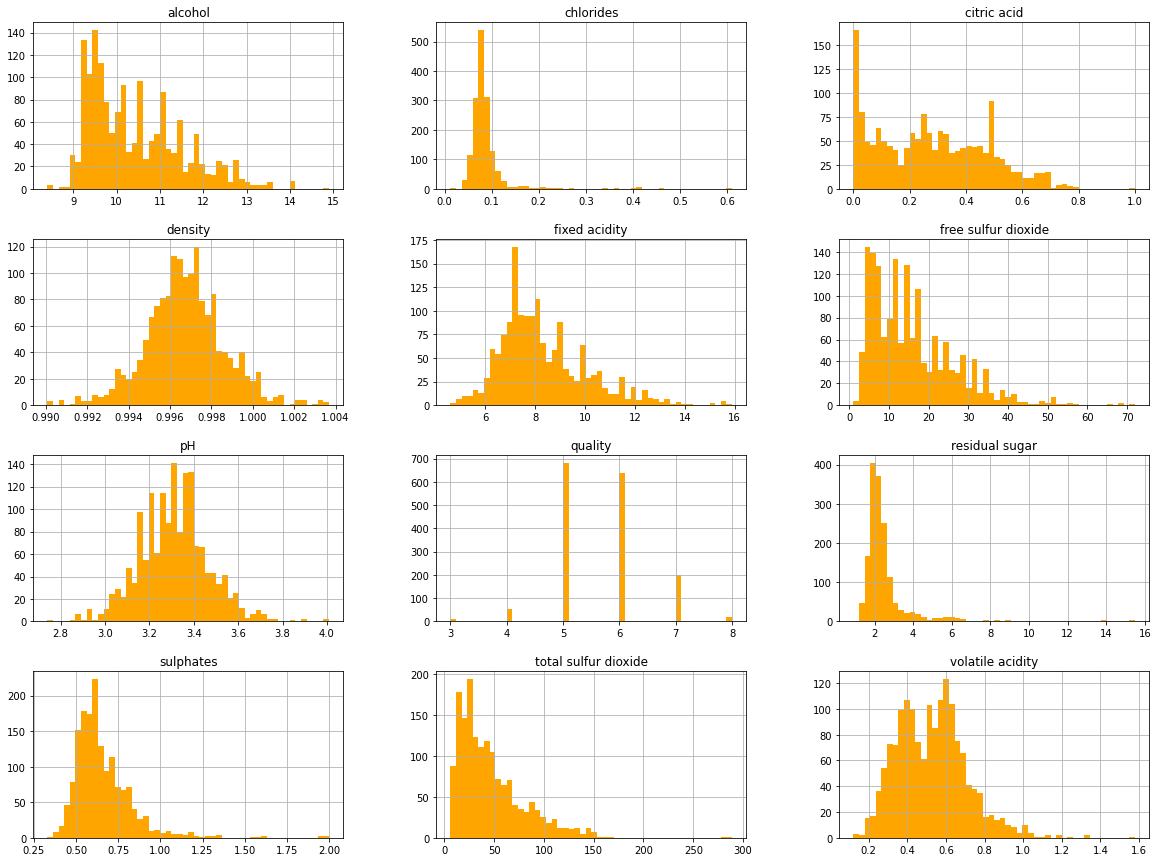

In [5]:
import matplotlib.pyplot as plt

wines.hist(bins=50, figsize=(20,15), color="orange")
plt.show()

### Split Dataset


In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wines, test_size=0.2, random_state=42)

### Prepare the Data

#### Get the Labels

In [7]:
wines_train_set = train_set.drop('quality', axis=1)
train_set_labels = train_set['quality'].copy()

#### Data Transformations

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numerical_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

cols = list(wines_train_set)
pipeline = ColumnTransformer([
        ("numerical_attributes", numerical_pipeline, cols),
    ])

prepared_train_set = pipeline.fit_transform(wines_train_set)
prepared_train_set.shape

(1279, 11)

### Training

#### Model: Linear Regression 

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

#### Cross-Validation

In [10]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np

lin_scores = cross_val_score(lin_reg, prepared_train_set, train_set_labels,
                             scoring="neg_mean_squared_error", cv = 10)
lin_scores_rmse = np.sqrt(-lin_scores)

In [11]:
def display_cv_scores(scores):
    print("Scores:\t", scores)
    print("Mean:\t", scores.mean())
    print("Std:\t", scores.std())

display_cv_scores(lin_scores_rmse)

Scores:	 [0.62576397 0.71661737 0.69198217 0.70092111 0.67935552 0.67375579
 0.66745333 0.67890987 0.49594792 0.64828114]
Mean:	 0.6578988186927085
Std:	 0.05921004161564628


### Fine-Tune the Model

#### Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'copy_X':[True,False], 'fit_intercept':[True,False], 'normalize':[True,False]}
]

grid_search = GridSearchCV(lin_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(prepared_train_set, train_set_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'copy_X': [True, False],
                          'fit_intercept': [True, False],
                          'normalize': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [13]:
grid_search.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Evaluate the Best Model on Test Set

In [14]:
final_model = grid_search.best_estimator_

X_test = test_set.drop('quality', axis=1)
y_test = test_set['quality'].copy()

X_test_prepared = pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print('RMSE:',final_rmse)

RMSE: 0.624519930798013


In [15]:
final_predictions[:5]

array([5.34666441, 5.05631345, 5.66446972, 5.46451484, 5.72518476])

In [16]:
y_test[:5]

803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64

### Note

From the obtained result we explicitly note explicitly that the model is underfitting the data.

Let's see if regularized models can do better.

## Regularized Models

### Ridge Regression

In [17]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1)

#Cross_validation
ridge_scores = cross_val_score(ridge_reg, prepared_train_set, train_set_labels,
                             scoring="neg_mean_squared_error", cv = 10)
ridge_scores_rmse = np.sqrt(-ridge_scores)

print('Cross-validation mean RMSE:', ridge_scores_rmse.mean())

#Grid Search
rr_param_grid = [
    {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
     "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
]

rr_grid_search = GridSearchCV(ridge_reg, rr_param_grid, cv=10, scoring='neg_mean_squared_error')
rr_grid_search.fit(prepared_train_set, train_set_labels)

#Evaluate on Test Set
rr_final_model = rr_grid_search.best_estimator_

rr_final_predictions = rr_final_model.predict(X_test_prepared)

rr_final_mse = mean_squared_error(y_test, rr_final_predictions)
rr_final_rmse = np.sqrt(rr_final_mse)

print('\nRidge Regression RMSE:', rr_final_rmse)

Cross-validation mean RMSE: 0.6578785480532684

Ridge Regression RMSE: 0.6265949319792461


### Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)

lasso_scores = cross_val_score(lasso_reg, prepared_train_set, train_set_labels,
                             scoring="neg_mean_squared_error", cv = 10)
lasso_scores_rmse = np.sqrt(-lasso_scores)

print('Cross-validation mean RMSE:', lasso_scores_rmse.mean())

#Grid Search
lr_param_grid = [
    {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    }
]

lr_grid_search = GridSearchCV(lasso_reg, lr_param_grid, cv=10, scoring='neg_mean_squared_error')
lr_grid_search.fit(prepared_train_set, train_set_labels)

#Evaluate on Test Set
lr_final_model = lr_grid_search.best_estimator_

lr_final_predictions = lr_final_model.predict(X_test_prepared)

lr_final_mse = mean_squared_error(y_test, lr_final_predictions)
lr_final_rmse = np.sqrt(lr_final_mse)

print('\nLasso Regression RMSE:', lr_final_rmse)

Cross-validation mean RMSE: 0.6808479057073624

Lasso Regression RMSE: 0.6269090970078782


### ElasticNet Regression

In [19]:
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)

en_scores = cross_val_score(en_reg, prepared_train_set, train_set_labels,
                             scoring="neg_mean_squared_error", cv = 10)
en_scores_rmse = np.sqrt(-en_scores)

print('Cross-validation mean RMSE:', en_scores_rmse.mean())

#Grid Search
en_param_grid = [
    {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    }
]

en_grid_search = GridSearchCV(en_reg, en_param_grid, cv=10, scoring='neg_mean_squared_error')
en_grid_search.fit(prepared_train_set, train_set_labels)

#Evaluate on Test Set
en_final_model = en_grid_search.best_estimator_

en_final_predictions = en_final_model.predict(X_test_prepared)

en_final_mse = mean_squared_error(y_test, en_final_predictions)
en_final_rmse = np.sqrt(en_final_mse)

print('\nElasticNet Regression RMSE:', en_final_rmse)

Cross-validation mean RMSE: 0.6673797389589298

ElasticNet Regression RMSE: 0.6266336164654579


## Conclusions

Again, the models achieved a high Root-Mean-Square Error.

To avoid undefitting we have two main possibilities:
 - Increase the instances of the dataset,
 - Use a more complex model;

In this case, since there are relatively few instances in the data set, the first approach could be preferred.